In [1]:
# Initial Setup

import numpy as np
import pandas as pd                
import keras
from keras.models import Sequential
import matplotlib.pyplot as plt    
from keras.layers import Dense
import os


Using TensorFlow backend.


In [2]:
# Load the Data

df = pd.read_csv("new_cardio_train.csv")

df.shape


(70000, 13)

In [3]:
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Delete ID column, since it's not necessary for prediction

del df['id']

df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# Convert age in Days to Years

df['age'] = df['age'].map(lambda x : x // 365)

df.head(5)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
# Check for Null Values

df.isnull().values.any()


False

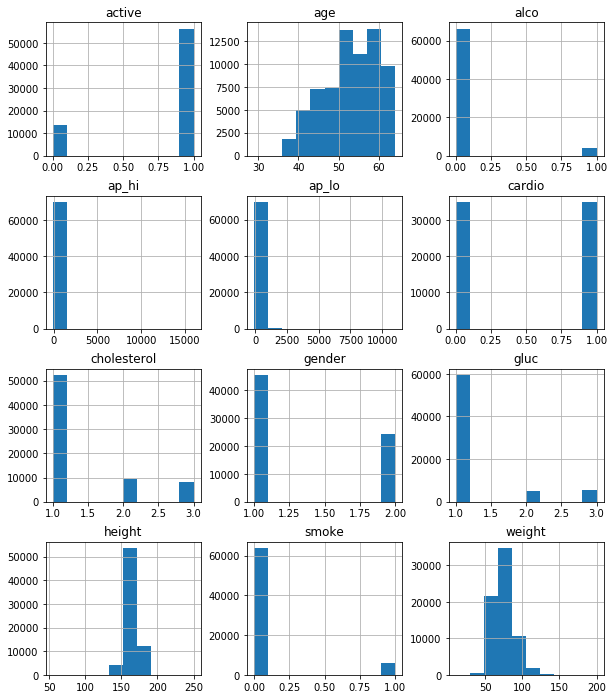

In [7]:
# Distribution

df.hist(figsize=(10,12))
plt.show()


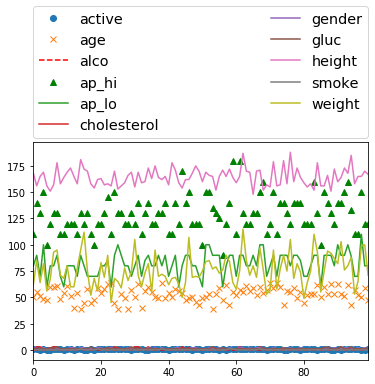

In [8]:
# Visualize Data Values Range

dataset_plot = df
dataset_plot[['active','age','alco','ap_hi','ap_lo','cholesterol','gender','gluc','height','smoke','weight']].head(100).plot(style=['o','x','r--','g^'])
plt.legend(bbox_to_anchor=(0.,1.02,1., .102), loc=3,ncol=2, mode="expand", fontsize="x-large", borderaxespad=0.)
plt.show()


In [9]:
X = df.drop(['cardio'], axis=1)
Y = df['cardio']


In [10]:
# Create Model

model = Sequential()
model.add(Dense(32, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [11]:
# Compile

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
tbCallBack = keras.callbacks.TensorBoard(histogram_freq=0, write_graph=True, write_images=True)


In [12]:
# Fit

history = model.fit(X, Y, validation_split = 0.20, epochs = 100, batch_size = 16)


Train on 56000 samples, validate on 14000 samples
Epoch 1/100
56000/56000 [==============================] - 4s 64us/step - loss: 0.8726 - accuracy: 0.6738 - val_loss: 0.6718 - val_accuracy: 0.6482
Epoch 2/100
56000/56000 [==============================] - 3s 62us/step - loss: 0.6388 - accuracy: 0.6993 - val_loss: 0.5784 - val_accuracy: 0.7149
Epoch 3/100
56000/56000 [==============================] - 3s 62us/step - loss: 0.6062 - accuracy: 0.7031 - val_loss: 0.5825 - val_accuracy: 0.7133
Epoch 4/100
56000/56000 [==============================] - 4s 66us/step - loss: 0.5859 - accuracy: 0.7061 - val_loss: 0.5808 - val_accuracy: 0.7062
Epoch 5/100
56000/56000 [==============================] - 4s 68us/step - loss: 0.5786 - accuracy: 0.7109 - val_loss: 0.5758 - val_accuracy: 0.7082
Epoch 6/100
56000/56000 [==============================] - 4s 71us/step - loss: 0.5717 - accuracy: 0.7136 - val_loss: 0.5733 - val_accuracy: 0.7096
Epoch 7/100
56000/56000 [==============================] - 4s 

Epoch 56/100
56000/56000 [==============================] - 3s 61us/step - loss: 0.5550 - accuracy: 0.7254 - val_loss: 0.5574 - val_accuracy: 0.7252
Epoch 57/100
56000/56000 [==============================] - 3s 62us/step - loss: 0.5539 - accuracy: 0.7261 - val_loss: 0.5596 - val_accuracy: 0.7224
Epoch 58/100
56000/56000 [==============================] - 4s 63us/step - loss: 0.5547 - accuracy: 0.7246 - val_loss: 0.5594 - val_accuracy: 0.7248
Epoch 59/100
56000/56000 [==============================] - 4s 65us/step - loss: 0.5542 - accuracy: 0.7257 - val_loss: 0.5567 - val_accuracy: 0.7259
Epoch 60/100
56000/56000 [==============================] - 3s 61us/step - loss: 0.5537 - accuracy: 0.7252 - val_loss: 0.5675 - val_accuracy: 0.7160
Epoch 61/100
56000/56000 [==============================] - 3s 61us/step - loss: 0.5534 - accuracy: 0.7258 - val_loss: 0.5627 - val_accuracy: 0.7183
Epoch 62/100
56000/56000 [==============================] - 3s 62us/step - loss: 0.5549 - accuracy: 0.7261

In [13]:
# Evaluate

scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


70000/70000 [==============================] - 1s 12us/step

accuracy: 72.83%


In [14]:
# Predict

model.predict(X)


array([[0.15277979],
       [0.8431524 ],
       [0.8098912 ],
       ...,
       [0.937191  ],
       [0.65303767],
       [0.4032498 ]], dtype=float32)

In [15]:
# Compare Validation and Training Results

print(history.history.keys())


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


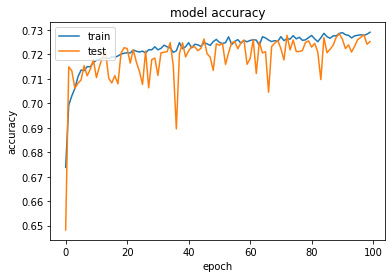

In [16]:
# Summarize history for Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


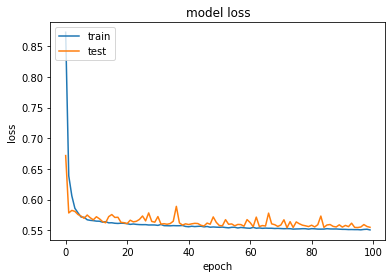

In [17]:
# Summarize history for Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [18]:
myX_false = [[47,1,156,56.0,100,60,1,1,0,0,0]]
myX_true = [[48,2,169,82.0,150,100,1,1,0,0,1]]
matrixX=np.array(myX_false, dtype = np.float64)
X_input = matrixX[:,0:11]
model.predict(X_input)


array([[0.14183079]], dtype=float32)